# 🧠 Algoritmo de Aprendizaje Automático Bagging

## Bootstrap Aggregating o Bagging

### Referencia de Scikit-Learn

- **Muestreo bootstrap:** muestreo con reemplazo.  
- **Combinación por promedio del resultado** (en regresión).  
- **Combinación por votación** (en clasificación).  
- Puede aplicarse a muchos clasificadores, incluyendo **ANN (redes neuronales artificiales)**, **CART (árboles de decisión)**, entre otros.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.dropna(inplace=True)
df['pclass'].unique()

array([1, 3, 2])

In [4]:
df['pclass'].value_counts()

pclass
1    157
2     15
3     10
Name: count, dtype: int64

In [5]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['sex'].value_counts()

sex
male      94
female    88
Name: count, dtype: int64

<Axes: >

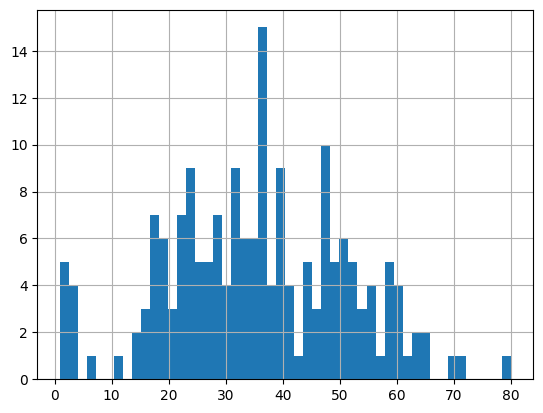

In [7]:
df['age'].hist(bins=50)

---
## Pre-procesado de datos

In [8]:
from sklearn import preprocessing

X = df[['pclass', 'sex', 'age']]
lb = preprocessing.LabelBinarizer()
X['sex'] = lb.fit_transform(X['sex'])

X.head()

C:\Users\PcVIP\AppData\Local\Temp\ipykernel_20464\1827443990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = lb.fit_transform(X['sex'])


,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [9]:
X.shape

(182, 3)

In [10]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [12]:
y = df['survived']

In [13]:
y.value_counts()

survived
1    123
0     59
Name: count, dtype: int64

---
# 🌲 Bosque Aleatorio (Random Forest)

## Conjunto de Árboles de Decisión

- **Entrenamiento mediante el método de Bagging** (muestreo repetido con reemplazo).

### Diferencias clave:
- **Bagging:** toma muestras de las observaciones (muestras de los datos).  
- **Random Forest (RF):** toma muestras tanto de **las observaciones** como de **los predictores (características)**.  
  - Se aplica tanto a **problemas de clasificación** como de **regresión**.  
  - Utiliza árboles **no correlacionados** entre sí.

### Comparación:
- **Random Forest:** muestrea **observaciones y características** del conjunto de entrenamiento.  
- **Bagging:** muestrea **solo observaciones** de manera aleatoria.  
- **Árbol de Decisión:** selecciona la **mejor característica** para dividir un nodo.


[📄 Paper](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf)



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9509

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.96      0.96      0.96       111

    accuracy                           0.95       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.95      0.95      0.95       163


Confusion Matrix: 
 [[ 48   4]
 [  4 107]]

ROC AUC: 0.9435

Average Accuracy: 	 0.7919
Accuracy SD: 		 0.0962


In [17]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.6842

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.71      0.83      0.77        12

    accuracy                           0.68        19
   macro avg       0.66      0.63      0.63        19
weighted avg       0.67      0.68      0.67        19


Confusion Matrix: 
 [[ 3  4]
 [ 2 10]]

ROC AUC: 0.6310



---
## Grid Search

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

grid_search.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


np.float64(0.8037878787878789)

In [19]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [20]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8773

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.90      0.93      0.91       111

    accuracy                           0.88       163
   macro avg       0.86      0.85      0.86       163
weighted avg       0.88      0.88      0.88       163


Confusion Matrix: 
 [[ 40  12]
 [  8 103]]

ROC AUC: 0.8486

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totallin

In [21]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8421

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.80      1.00      0.89        12

    accuracy                           0.84        19
   macro avg       0.90      0.79      0.81        19
weighted avg       0.87      0.84      0.83        19


Confusion Matrix: 
 [[ 4  3]
 [ 0 12]]

ROC AUC: 0.7857



---
# 🌳 Ensamble de Extra-Trees (Árboles Extremadamente Aleatorios) 🤖

## 🧠 Concepto Clave

Extra-Trees es un método de *ensemble* (conjunto) que, al igual que **Random Forest**, se construye sobre la base de múltiples **Árboles de Decisión**. Sin embargo, introduce un mayor grado de aleatoriedad en el proceso de construcción de cada árbol para mejorar la robustez y la eficiencia.

---

## 🆚 Comparación con Árboles de Decisión (Decision Tree)

| Característica | Árbol de Decisión Estándar | Extra-Trees (Extremely Randomized Trees) |
| :--- | :--- | :--- |
| **Construcción** | La división de nodos se basa en métricas como **Gini** o **Entropía**, buscando el **mejor *split*** (punto de corte) para maximizar la ganancia de información. | Se utiliza un mecanismo de división más aleatorio. |
| **Umbral de División** | Se evalúan todos los posibles umbrales de división para cada característica seleccionada y se elige el óptimo. | **Genera umbrales de división aleatorios** para cada característica. |
| **Aleatoriedad** | Aleatoriedad al seleccionar la submuestra de características (si se usa). | Aleatoriedad al seleccionar la submuestra de características **Y** aleatoriedad al elegir el umbral de división. |

---

## 🛠️ Implementación

* El algoritmo de Extra-Trees está disponible en la librería **scikit-learn** de Python, proporcionando una alternativa eficiente a Random Forest.
* Al emplear umbrales aleatorios, **Extra-Trees puede ser más rápido de entrenar** que Random Forest, ya que no necesita calcular el umbral óptimo en cada división.

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

xt_clf = ExtraTreesClassifier(random_state=42)
xt_clf.fit(X_train, y_train)

print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9509

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        52
           1       0.99      0.94      0.96       111

    accuracy                           0.95       163
   macro avg       0.93      0.96      0.95       163
weighted avg       0.96      0.95      0.95       163


Confusion Matrix: 
 [[ 51   1]
 [  7 104]]

ROC AUC: 0.9589

Average Accuracy: 	 0.7735
Accuracy SD: 		 0.0910


In [28]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7368

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.77      0.83      0.80        12

    accuracy                           0.74        19
   macro avg       0.72      0.70      0.71        19
weighted avg       0.73      0.74      0.73        19


Confusion Matrix: 
 [[ 4  3]
 [ 2 10]]

ROC AUC: 0.7024



In [24]:
def eval_gini(y_true, y_prob):
    """
    Original author CPMP : https://www.kaggle.com/cpmpml
    In kernel : https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini